In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("hour.csv")

In [10]:
df.head(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
df.shape

(17379, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
df.rename(columns={'instant':'rec_id',
                  'dteday':'datetime',
                   'yr':'year',
                   'mnth':'month',
                   'hr':'hour',
                   'holiday':'isHoliday',
                   'workingday':'isWorkingday',
                   'weathersit':'weatherCondition',
                   'hum':'humidity',
                   'cnt':'totalCount'
                  },inplace=True)

In [12]:
df.head()

,rec_id,datetime,season,year,month,hour,isHoliday,weekday,isWorkingday,weatherCondition,temp,atemp,humidity,windspeed,casual,registered,totalCount
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
df['datetime']=pd.to_datetime(df['datetime'])

In [14]:
df['season']=df['season'].astype('category')
df['year']=df['year'].astype('category')
df['isHoliday']=df['isHoliday'].astype('category')
df['isWorkingday']=df['isWorkingday'].astype('category')
df['weatherCondition']=df['weatherCondition'].astype('category')
df['month']=df['month'].astype('category')
df['hour']=df['hour'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rec_id            17379 non-null  int64         
 1   datetime          17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   year              17379 non-null  category      
 4   month             17379 non-null  category      
 5   hour              17379 non-null  category      
 6   isHoliday         17379 non-null  category      
 7   weekday           17379 non-null  category      
 8   isWorkingday      17379 non-null  category      
 9   weatherCondition  17379 non-null  category      
 10  temp              17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  humidity          17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual            1737

In [16]:
df.head()

,rec_id,datetime,season,year,month,hour,isHoliday,weekday,isWorkingday,weatherCondition,temp,atemp,humidity,windspeed,casual,registered,totalCount
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

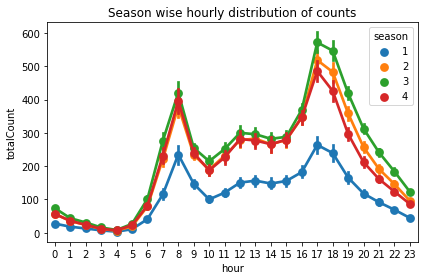

In [21]:
fig,axis=plt.subplots()
sns.pointplot(data=df[['hour','season','totalCount']],x='hour',y='totalCount',hue='season',ax=axis)
axis.set(title='Season wise hourly distribution of counts')
plt.tight_layout()

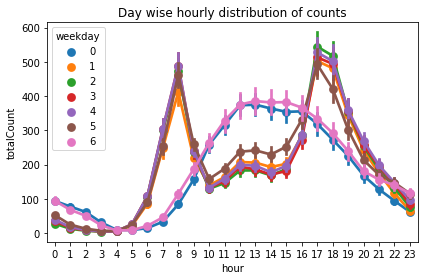

In [22]:
fig,axis=plt.subplots()
sns.pointplot(data=df[['hour','weekday','totalCount']],x='hour',y='totalCount',hue='weekday',ax=axis)
axis.set(title='Day wise hourly distribution of counts')
plt.tight_layout()

[Text(0.5, 1.0, 'Monthly distribution of counts')]

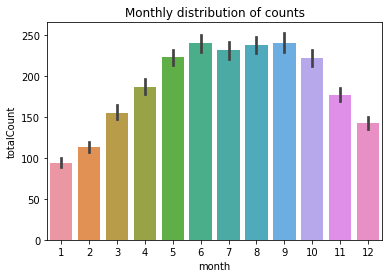

In [24]:
fig,axis=plt.subplots()
sns.barplot(data=df[['month','totalCount']],x='month',y='totalCount')
axis.set(title='Monthly distribution of counts')

[Text(0.5, 1.0, 'total counts per season')]

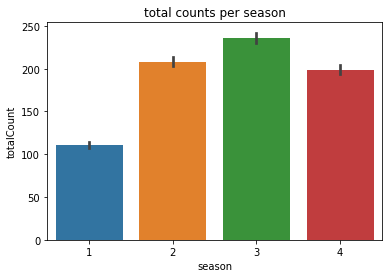

In [29]:
fig,axis=plt.subplots()
sns.barplot(data=df[['month','season','totalCount']],x='season',y='totalCount')
axis.set(title='total counts per season')

[Text(0.5, 1.0, 'monthly distribution of counts in season 1')]

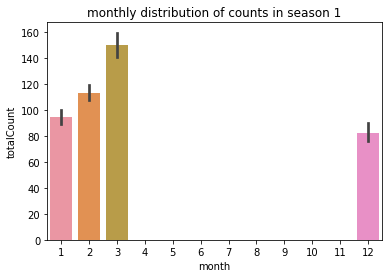

In [30]:
fig,axis=plt.subplots()
sns.barplot(data=df[df['season']==1],x='month',y='totalCount')
axis.set(title='monthly distribution of counts in season 1')

[Text(0.5, 1.0, 'monthly distribution of counts in season 2')]

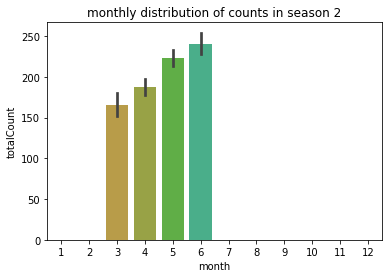

In [31]:
fig,axis=plt.subplots()
sns.barplot(data=df[df['season']==2],x='month',y='totalCount')
axis.set(title='monthly distribution of counts in season 2')

[Text(0.5, 1.0, 'monthly distribution of counts in season 3')]

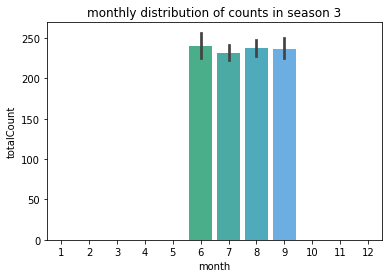

In [32]:
fig,axis=plt.subplots()
sns.barplot(data=df[df['season']==3],x='month',y='totalCount')
axis.set(title='monthly distribution of counts in season 3')

[Text(0.5, 1.0, 'monthly distribution of counts in season 4')]

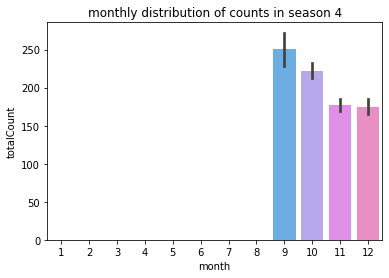

In [33]:
fig,axis=plt.subplots()
sns.barplot(data=df[df['season']==4],x='month',y='totalCount')
axis.set(title='monthly distribution of counts in season 4')

<AxesSubplot:xlabel='year', ylabel='totalCount'>

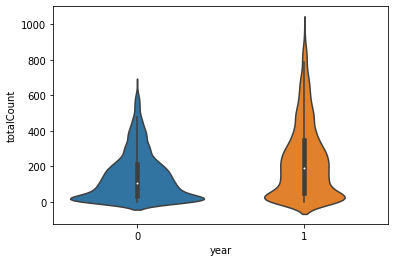

In [34]:
sns.violinplot(data=df[['year','totalCount']],x='year',y='totalCount')

<AxesSubplot:>

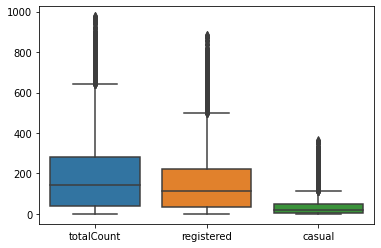

In [35]:
sns.boxplot(data=df[['totalCount','registered','casual']])

<AxesSubplot:>

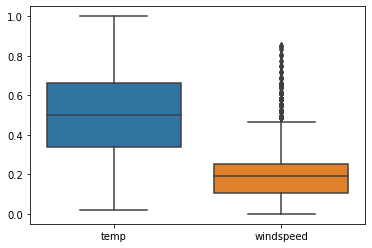

In [36]:
sns.boxplot(data=df[['temp','windspeed']])

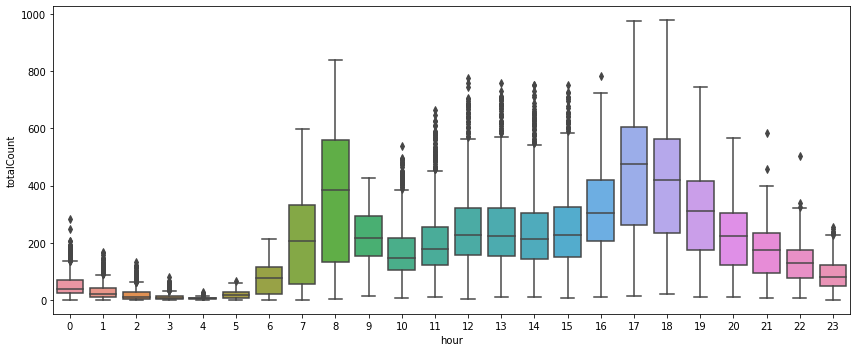

In [41]:
fig,ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=df[['totalCount','hour',]],x='hour',y='totalCount',ax=ax)
plt.tight_layout()


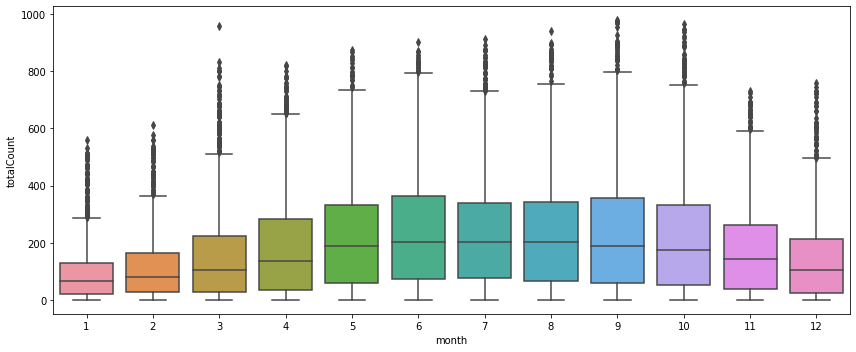

In [42]:
fig,ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=df[['totalCount','month',]],x='month',y='totalCount',ax=ax)
plt.tight_layout()


In [43]:
corrMatt=df[['temp','atemp','humidity','windspeed','casual','registered','totalCount']].corr()

In [51]:
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

<AxesSubplot:>

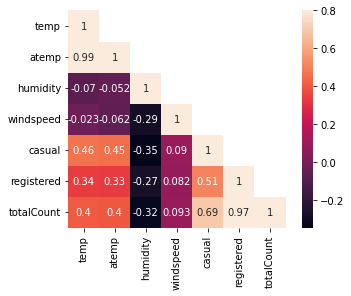

In [52]:
sns.heatmap(corrMatt,mask=mask,square=True,annot=True,vmax=0.8)

In [53]:
from sklearn.preprocessing import OneHotEncoder 

In [54]:
from sklearn.model_selection import train_test_split

In [148]:
# df.drop('datetime',axis=1,inplace=True)
# df = pd.get_dummies(df, columns=['season'], dtype=int)

df['season'] = df[['season_1', 'season_2', 'season_3', 'season_4']].idxmax(axis=1)
df['season'] = df['season'].map({'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-3], df.iloc[:,-1], test_size=0.33, random_state=42)

In [149]:
df.head()

,rec_id,year,month,hour,isHoliday,weekday,isWorkingday,weatherCondition,temp,atemp,humidity,windspeed,casual,registered,totalCount,season_1,season_2,season_3,season_4,season
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,spring
1,2,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,spring
2,3,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,spring
3,4,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,spring
4,5,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,spring


In [151]:
# Define a function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# Apply the function to the 'hr' column to create the new 'rush_hour' feature
df['rush_hour'] = df['hour'].apply(is_rush_hour)
df.head()

,rec_id,year,month,hour,isHoliday,weekday,isWorkingday,weatherCondition,temp,atemp,...,windspeed,casual,registered,totalCount,season_1,season_2,season_3,season_4,season,rush_hour
0,1,0,1,0,0,6,0,1,0.24,0.2879,...,0.0,3,13,16,1,0,0,0,spring,0
1,2,0,1,1,0,6,0,1,0.22,0.2727,...,0.0,8,32,40,1,0,0,0,spring,0
2,3,0,1,2,0,6,0,1,0.22,0.2727,...,0.0,5,27,32,1,0,0,0,spring,0
3,4,0,1,3,0,6,0,1,0.24,0.2879,...,0.0,3,10,13,1,0,0,0,spring,0
4,5,0,1,4,0,6,0,1,0.24,0.2879,...,0.0,0,1,1,1,0,0,0,spring,0


In [136]:
# X_train.reset_index(inplace=True)
# y_train=y_train.reset_index()

# X_test.reset_index(inplace=True)
# y_test=y_test.reset_index()
# y_test

,index,totalCount
0,12830,425
1,8688,88
2,7091,4
3,12230,526
4,431,13
...,...,...
5731,6260,35
5732,16788,215
5733,819,161
5734,15323,634


In [109]:
# cat_list=['season','year','isHoliday','isWorkingday','weatherCondition','month','hour','weekday']
# encoded_list=[]
# enc=OneHotEncoder()
# for col in cat_list:
#     obj=enc.fit_transform(X_train[[col]])
#     encoded_list.append({'label_enc':obj[0],
#                         'ohe_enc':obj[1],
#                         'feature_df':obj[2],
# #                         'col_name':col})

In [110]:
# feature_df_list=[X_train[['temp','atemp','humidity','windspeed']]]

In [112]:
# # for enc in encoded_list:
# #     if enc['col_name'] in cat_list:
# #         feature_df_list.extend(enc['feature_df'])
# import scipy
# feature_df_list.extend([scipy.sparse.csr_matrix(enc['feature_df'])  # Convert sparse matrix to CSR format
#                         for enc in encoded_list
#                         if enc['col_name'] in cat_list])

In [113]:
# # train_df_new = pd.DataFrame.sparse.from_spmatrix(feature_df_list) 
# # train_df_new = pd.DataFrame(feature_df_list)
# # df = pd.DataFrame.sparse.from_spmatrix(A,
# # encoded_list[0]['feature_df']
# encoded_dfs = [pd.DataFrame.sparse.from_spmatrix(enc) if isinstance(enc, scipy.sparse.csr.csr_matrix) else enc
#                for enc in feature_df_list]
# train_df_new = pd.concat(encoded_dfs, axis=1)

C:\Users\Naitri Doshi\AppData\Local\Temp\ipykernel_129556\914075673.py:5: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  encoded_dfs = [pd.DataFrame.sparse.from_spmatrix(enc) if isinstance(enc, scipy.sparse.csr.csr_matrix) else enc


In [114]:
# train_df_new

,temp,atemp,humidity,windspeed,0,1,2,3,0,1,...,21,22,23,0,1,2,3,4,5,6
0,0.64,0.6061,0.65,0.1940,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.50,0.4848,0.45,0.2239,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.86,0.8030,0.47,0.5224,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.30,0.3333,0.61,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.54,0.5152,0.19,0.4179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638,0.46,0.4545,0.88,0.0896,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11639,0.66,0.6212,0.34,0.1343,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11640,0.80,0.7273,0.43,0.2836,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11641,0.24,0.1970,0.65,0.4179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
x_data = df.drop(['totalCount','season','rec_id'], axis=1)
y_data = df['totalCount']
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=56)

In [185]:
X_train

,year,month,hour,isHoliday,weekday,isWorkingday,weatherCondition,temp,atemp,humidity,windspeed,casual,registered,season_1,season_2,season_3,season_4,rush_hour
11165,1,4,10,0,0,0,1,0.58,0.5455,0.53,0.2239,186,235,0,1,0,0,0
5833,0,9,12,1,1,0,2,0.72,0.6818,0.70,0.1940,141,212,0,0,1,0,0
1607,0,3,11,0,6,0,1,0.34,0.3030,0.49,0.3284,36,83,1,0,0,0,0
5436,0,8,10,0,5,1,1,0.72,0.6818,0.62,0.0896,57,108,0,0,1,0,0
10263,1,3,17,0,4,1,1,0.62,0.6212,0.38,0.6567,52,545,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,1,1,0,0,1,1,2,0.32,0.2879,0.26,0.4179,0,10,1,0,0,0,0
13730,1,7,7,0,2,1,1,0.68,0.6364,0.83,0.2239,21,492,0,0,1,0,1
3264,0,5,22,0,5,1,1,0.54,0.5152,0.73,0.0000,28,124,0,1,0,0,0
399,0,1,15,0,2,1,2,0.22,0.2273,0.87,0.1642,3,32,1,0,0,0,0


In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [187]:
lm=LinearRegression()

In [188]:
lm.fit(X_train,y_train)

LinearRegression()

In [189]:
pred=lm.predict(X_test)

C:\Users\Naitri Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Naitri Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


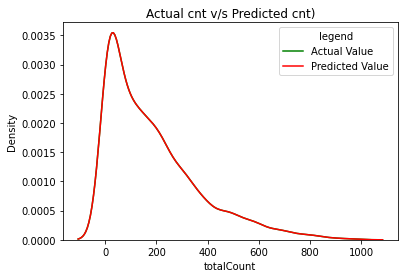

In [190]:
plt.title("Actual cnt v/s Predicted cnt)")
ax1 = sns.distplot(y_test,hist=False,color="green",label="Actual Value")
sns.distplot(pred,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [191]:
mse = mean_squared_error(y_test, pred)
print('The mean square error of cnt and predicted value is: ', mse)

The mean square error of cnt and predicted value is:  8.969541012664015e-26
